In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
     --- ------------------------------------ 0.5/6.2 MB 4.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.0/6.2 MB 2.7 MB/s eta 0:00:02
     ---------- ----------------------------- 1.6/6.2 MB 2.9 MB/s eta 0:00:02
     --------------- ------------------------ 2.4/6.2 MB 2.9 MB/s eta 0:00:02
     ------------------ --------------------- 2.9/6.2 MB 3.0 MB/s eta 0:00:02
     ----------------------- ---------------- 3.7/6.2 MB 3.1 MB/s eta 0:00:01
     --------------------------- ------------ 4.2/6.2 MB 3.0 MB/s eta 0:00:01
     -------------------------------- ------- 5.0/6.2 MB 3.2 MB/s eta 0:00:01
     ------------------------------------- -- 5.8/6.2 MB 3.1 MB/s eta 0:00:01
     ---------------------------------------- 6.2/6.2 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
     ------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ARYAN\miniconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\ARYAN\miniconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ARYAN\miniconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ARYAN\miniconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ARYAN\miniconda3\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\ARYAN\miniconda3\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)
      

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 2.8 MB/s eta 0:00:01
   ---------- ----------------------------- 0.8/2.9 MB 2.0 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.9 MB 2.5 MB/s eta 0:00:01
   ----------------------------- ---------- 2.1/2.9 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.9/2.9 MB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.6 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.1 MB 4.2 MB/s eta 0:00:49
   ---------------------------------------- 1.0/204.1 MB 3.1 MB/s eta 0:01:05
   -------------------------------

In [4]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import os
import random

In [14]:
folder_path = os.path.join("..", "Plot QA Dataset", "train", "png")

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Choose a random image file
random_image = random.choice(image_files)

# Get the full file path
random_image_path = os.path.join(folder_path, random_image)

In [15]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(random_image_path)

Using CPU. Note: This module is much faster with a GPU.


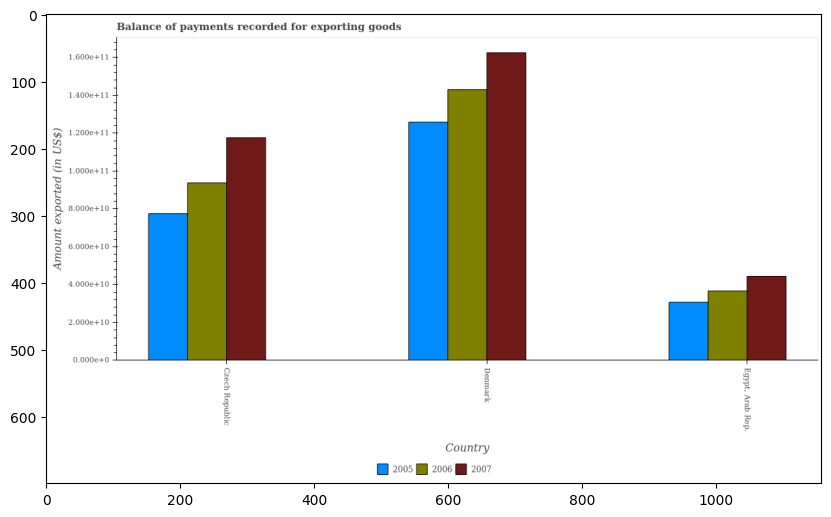

In [19]:
img = cv2.imread(random_image_path)
# Convert BGR image (OpenCV default) to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

Balance of payments recorded for exporting goods
~G0Oe+ll
400e+11
z00e+11
9
4
~oOe+il
1
00Oe+10
1
0ode+10
0ode+10
00Oe+10
00Oe+0
1
I
1
1
2
3
Country
2005
2006
2007


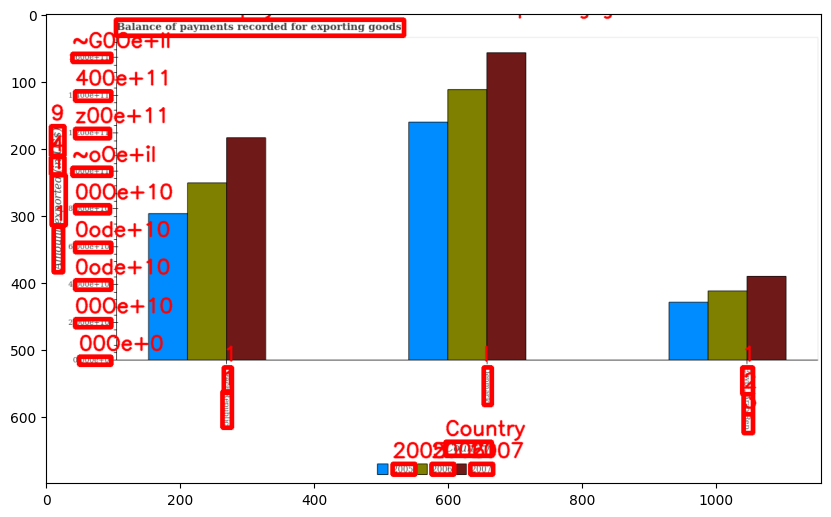

In [20]:
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    print(text)
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, 255, 5)
    img = cv2.putText(img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

# Convert BGR image (OpenCV default) to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()